# Demo 8 - Advanced Nets - Transfer Learning e utilização da VGG-16

### 2TIAR - Inteligência Artificial

### Demo - Implementação de um classificador de gatos e cachorros utilizando VGG-16 (Transfer Learning) - https://neurohive.io/en/popular-networks/vgg16/


## Baixando dados de gatos e cachorros para treinamento de nossa rede

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2023-03-30 17:11:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.96.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.8MB/s    in 2.2s    

2023-03-30 17:11:18 (29.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Unzip da pasta baixada anteriormente

In [2]:

! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

## Imports Necessários

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

## Verificação de imagens/classes

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Construção de nossa arquitetura (vide doc. exemplo)

#### Artigo original: https://arxiv.org/abs/1409.1556

In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [6]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

# Salvando o modelo criado para uso posterior (tarefa de classificação de imagens)

In [8]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=100)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


# Treinamento 

In [9]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint])

<ipython-input-9-7f34659269f1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint])


Epoch 1/10
10/10 [==============================] - 34s 581ms/step - loss: 944.5518 - accuracy: 0.5562 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 6s 663ms/step - loss: 0.7648 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5156
Epoch 3/10
10/10 [==============================] - 6s 662ms/step - loss: 0.6968 - accuracy: 0.5125 - val_loss: 0.6935 - val_accuracy: 0.5188
Epoch 4/10
10/10 [==============================] - 6s 580ms/step - loss: 0.6968 - accuracy: 0.4844 - val_loss: 0.6945 - val_accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.6957 - accuracy: 0.4770 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 7s 671ms/step - loss: 0.6941 - accuracy: 0.5063 - val_loss: 0.6917 - val_accuracy: 0.5250
Epoch 7/10
10/10 [==============================] - 7s 669ms/step - loss: 0.6952 - accuracy: 0.4750 - val_loss: 0.6933 - val_accuracy: 0.4625
Epoch

# Import de imagens para teste 

In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo de nome "{name}" de tamanho {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sphinx-cat.jpeg to sphinx-cat.jpeg
Arquivo de nome "sphinx-cat.jpeg" de tamanho 4011 bytes


# Classificação (ex: cães e gatos)

1/1 [==============================] - 0s 159ms/step
cat


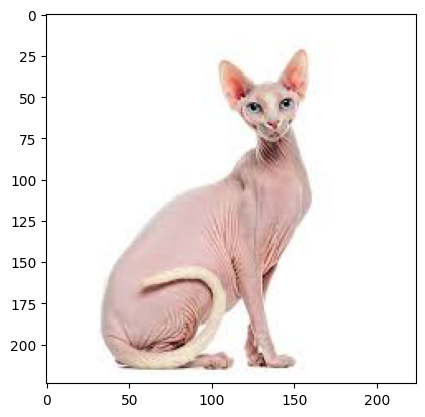

In [15]:
import keras.utils as image
from keras.models import load_model
import matplotlib.pyplot as plt

img = image.load_img("sphinx-cat.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')